> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   Classical acGAN in offline settings
*   Classical acGAN in online settings
*   acGAN with join retrain
*   **acGAN with replay alignment**

In [2]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [3]:
config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    channels=1,
    n_epochs=[100,100],
    batch_size=32,
    embedding=100, # latent dimension of embedding
    lr_g=7e-5, # Learning rate for generator 7e-5
    lr_d=7e-5 # Learning rate for discriminator
)

## acGAN with replay alignment (training)
We create the acGAN with the replay alignment, the architecture is very similar to the classical acGAN, in fact, the model learns only with the current experience. However, in this implementation, we added new loss: the **replay alignment**.

The behavior is the following: in the first experience, the model learns as a classical acGAN. Starting from the second experience, the generator wants to optimize not only the adversarial and auxiliary loss, but **also minimize the L2 of difference between the current generator and the previous one** (experience) in the past classes.

In this notebook we present some results varying the number of experiences and the *constant of replay alignment*, With the latter, we leverage the forgetting: with high value we pull the model to be equal to the previous experience, with low value we allow the fast adaptation.

### Learning from 2 experiences and cost = 0.6

After several experiments varying from [0.1..1], we purpose some results.
The first result it is with constant equal to 0.6.

In [ ]:
experiences = [[0,1,2,3,4],[5,6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences), const_ra=0.6)

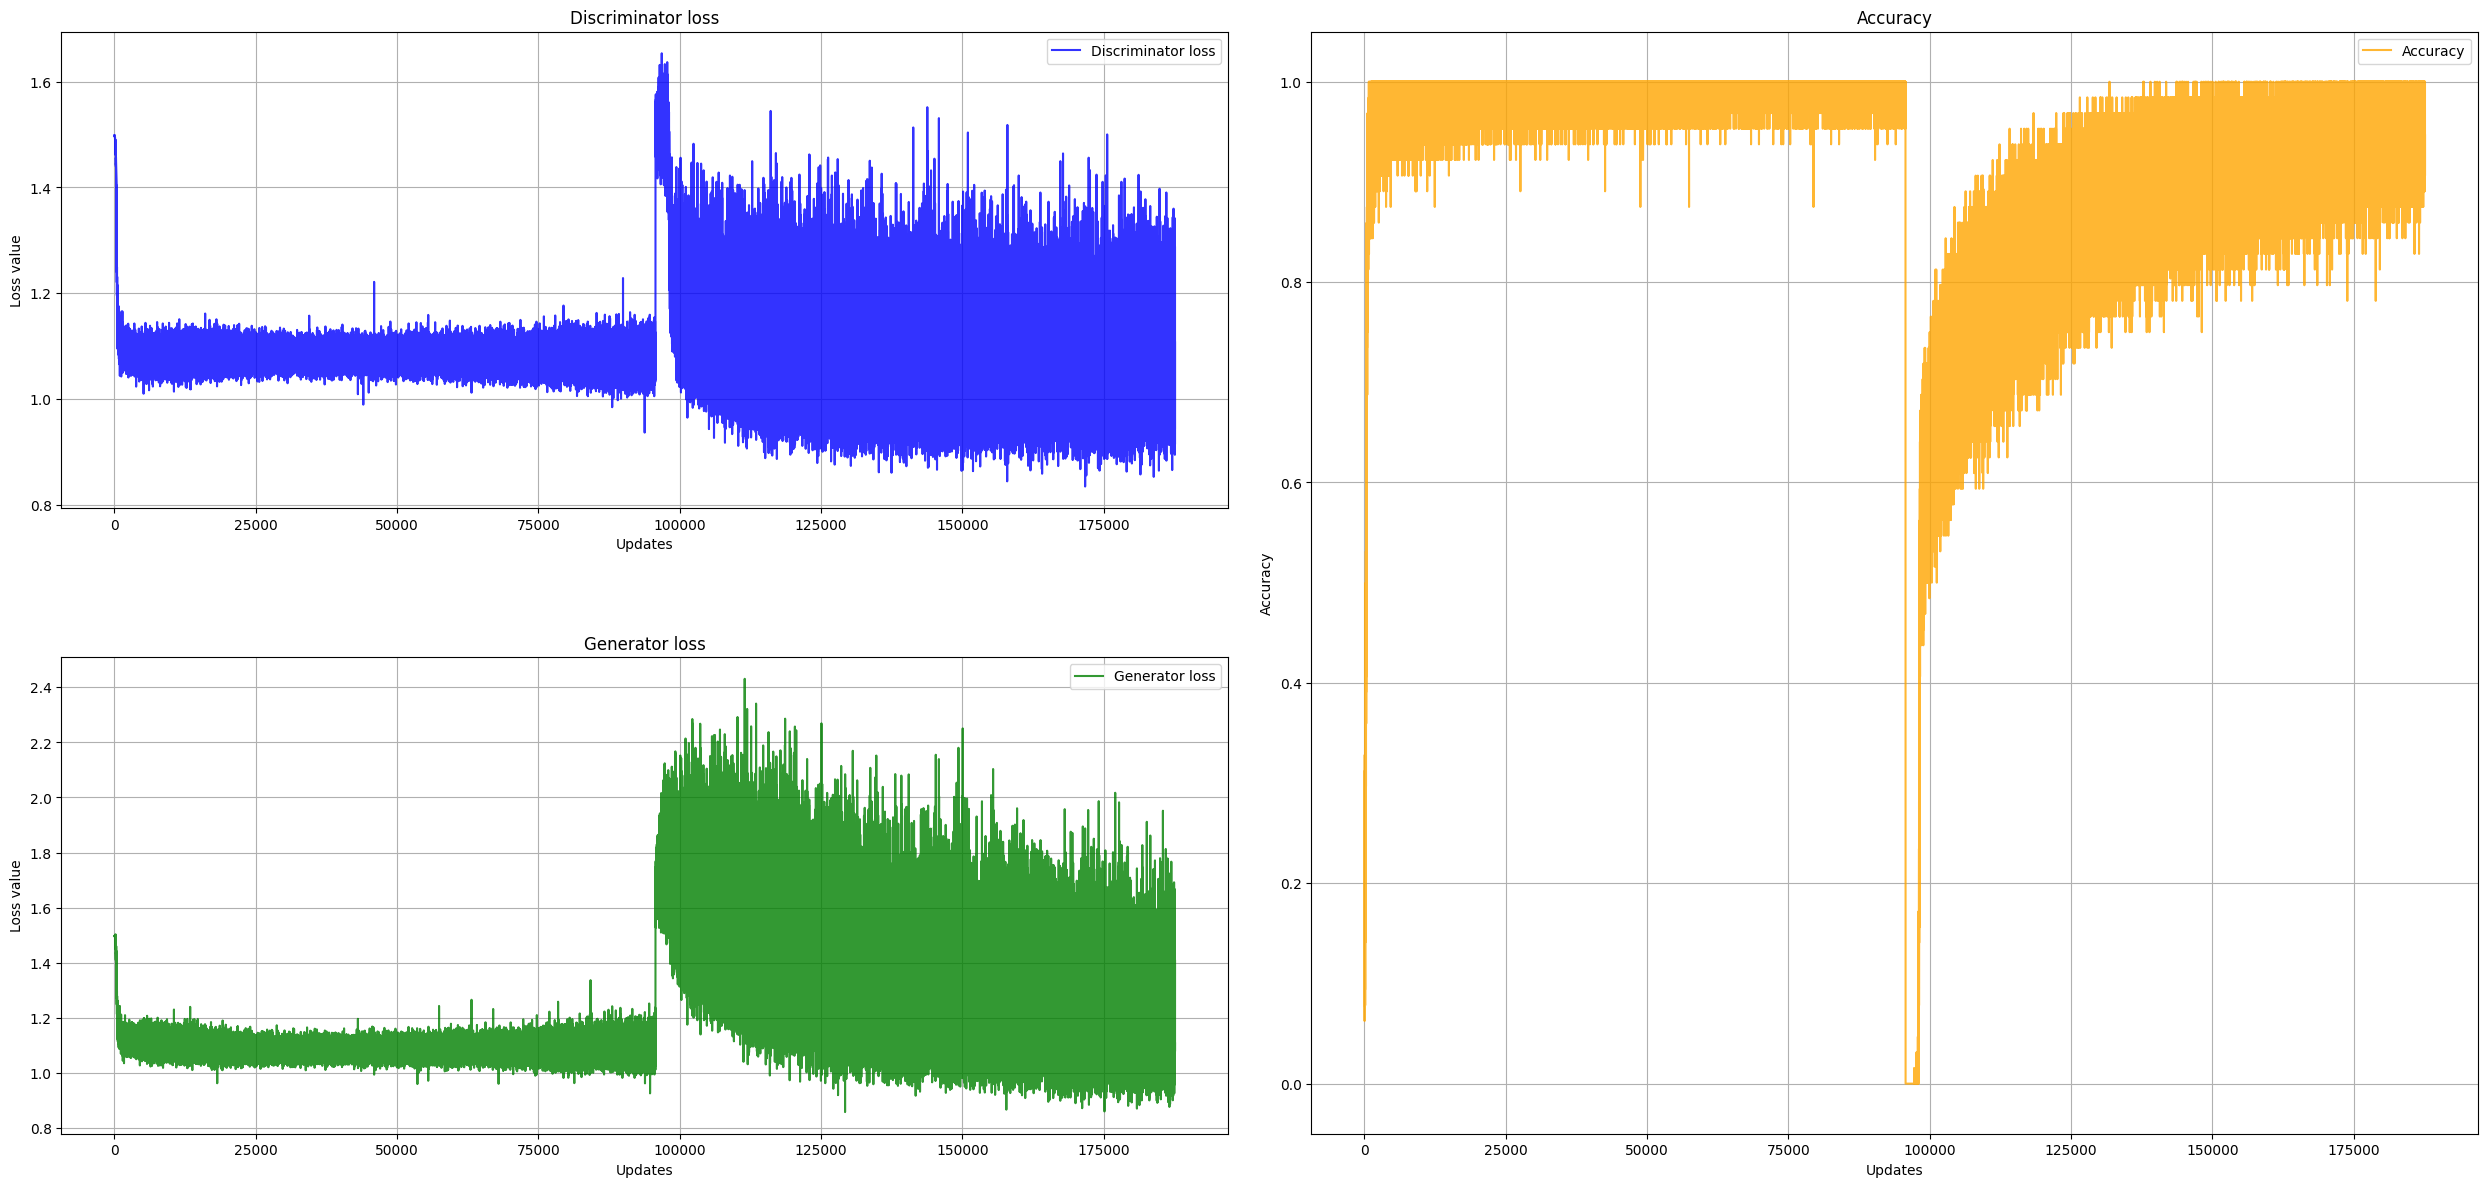

In [ ]:
plot_history(history)

In this case, the constant seems to be optimal, the model is able to generate quite well all numbers.

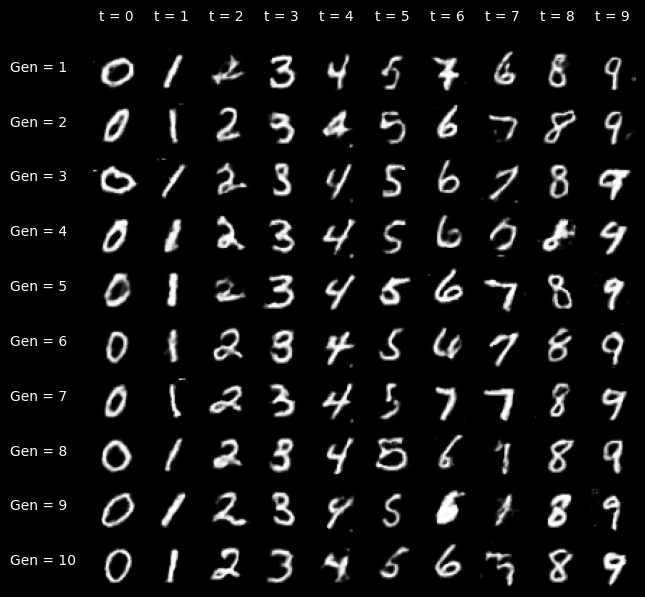

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Learning from 2 experiences and cost = 0.8

In [ ]:
experiences = [[0,1,2,3,4],[5,6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences), const_ra=0.8)

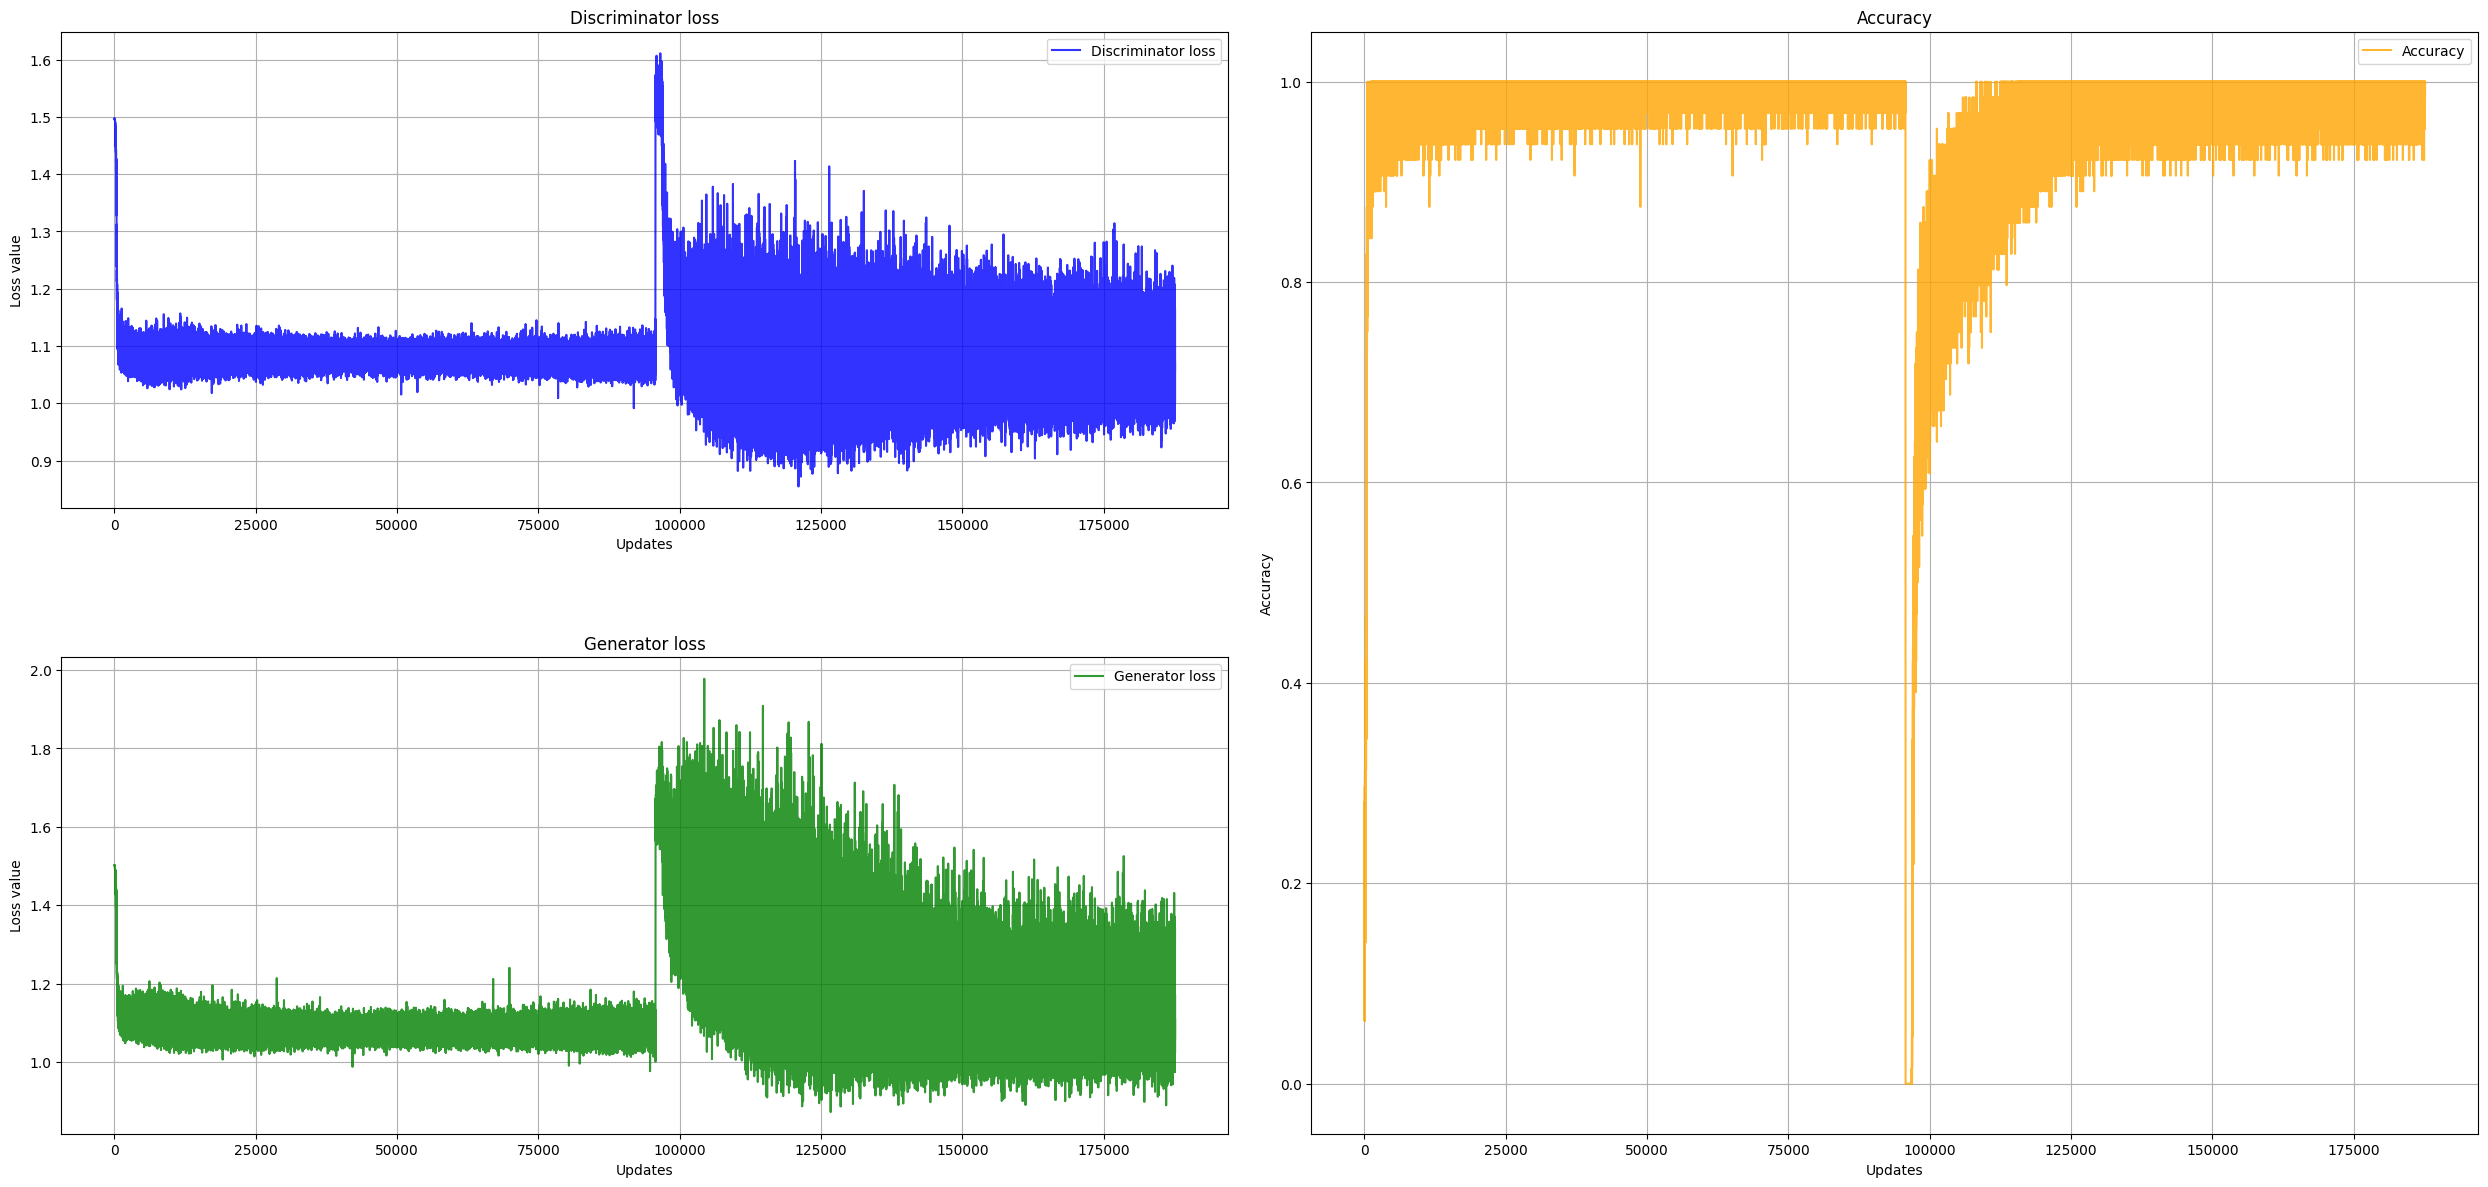

In [ ]:
plot_history(history)

Also in this way, the constant seems to be optimal, the model is able to generate quite well all numbers.

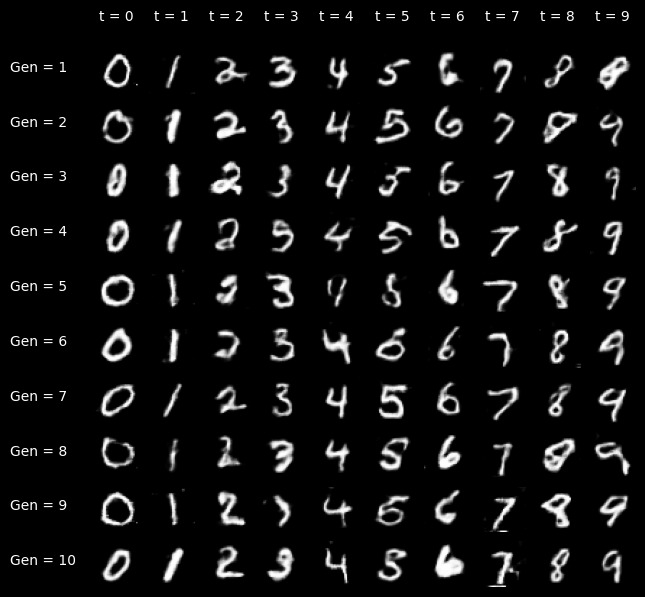

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Learning from 2 experiences and cost = 0.9

In [ ]:
experiences = [[0,1,2,3,4],[5,6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences), const_ra=0.9)

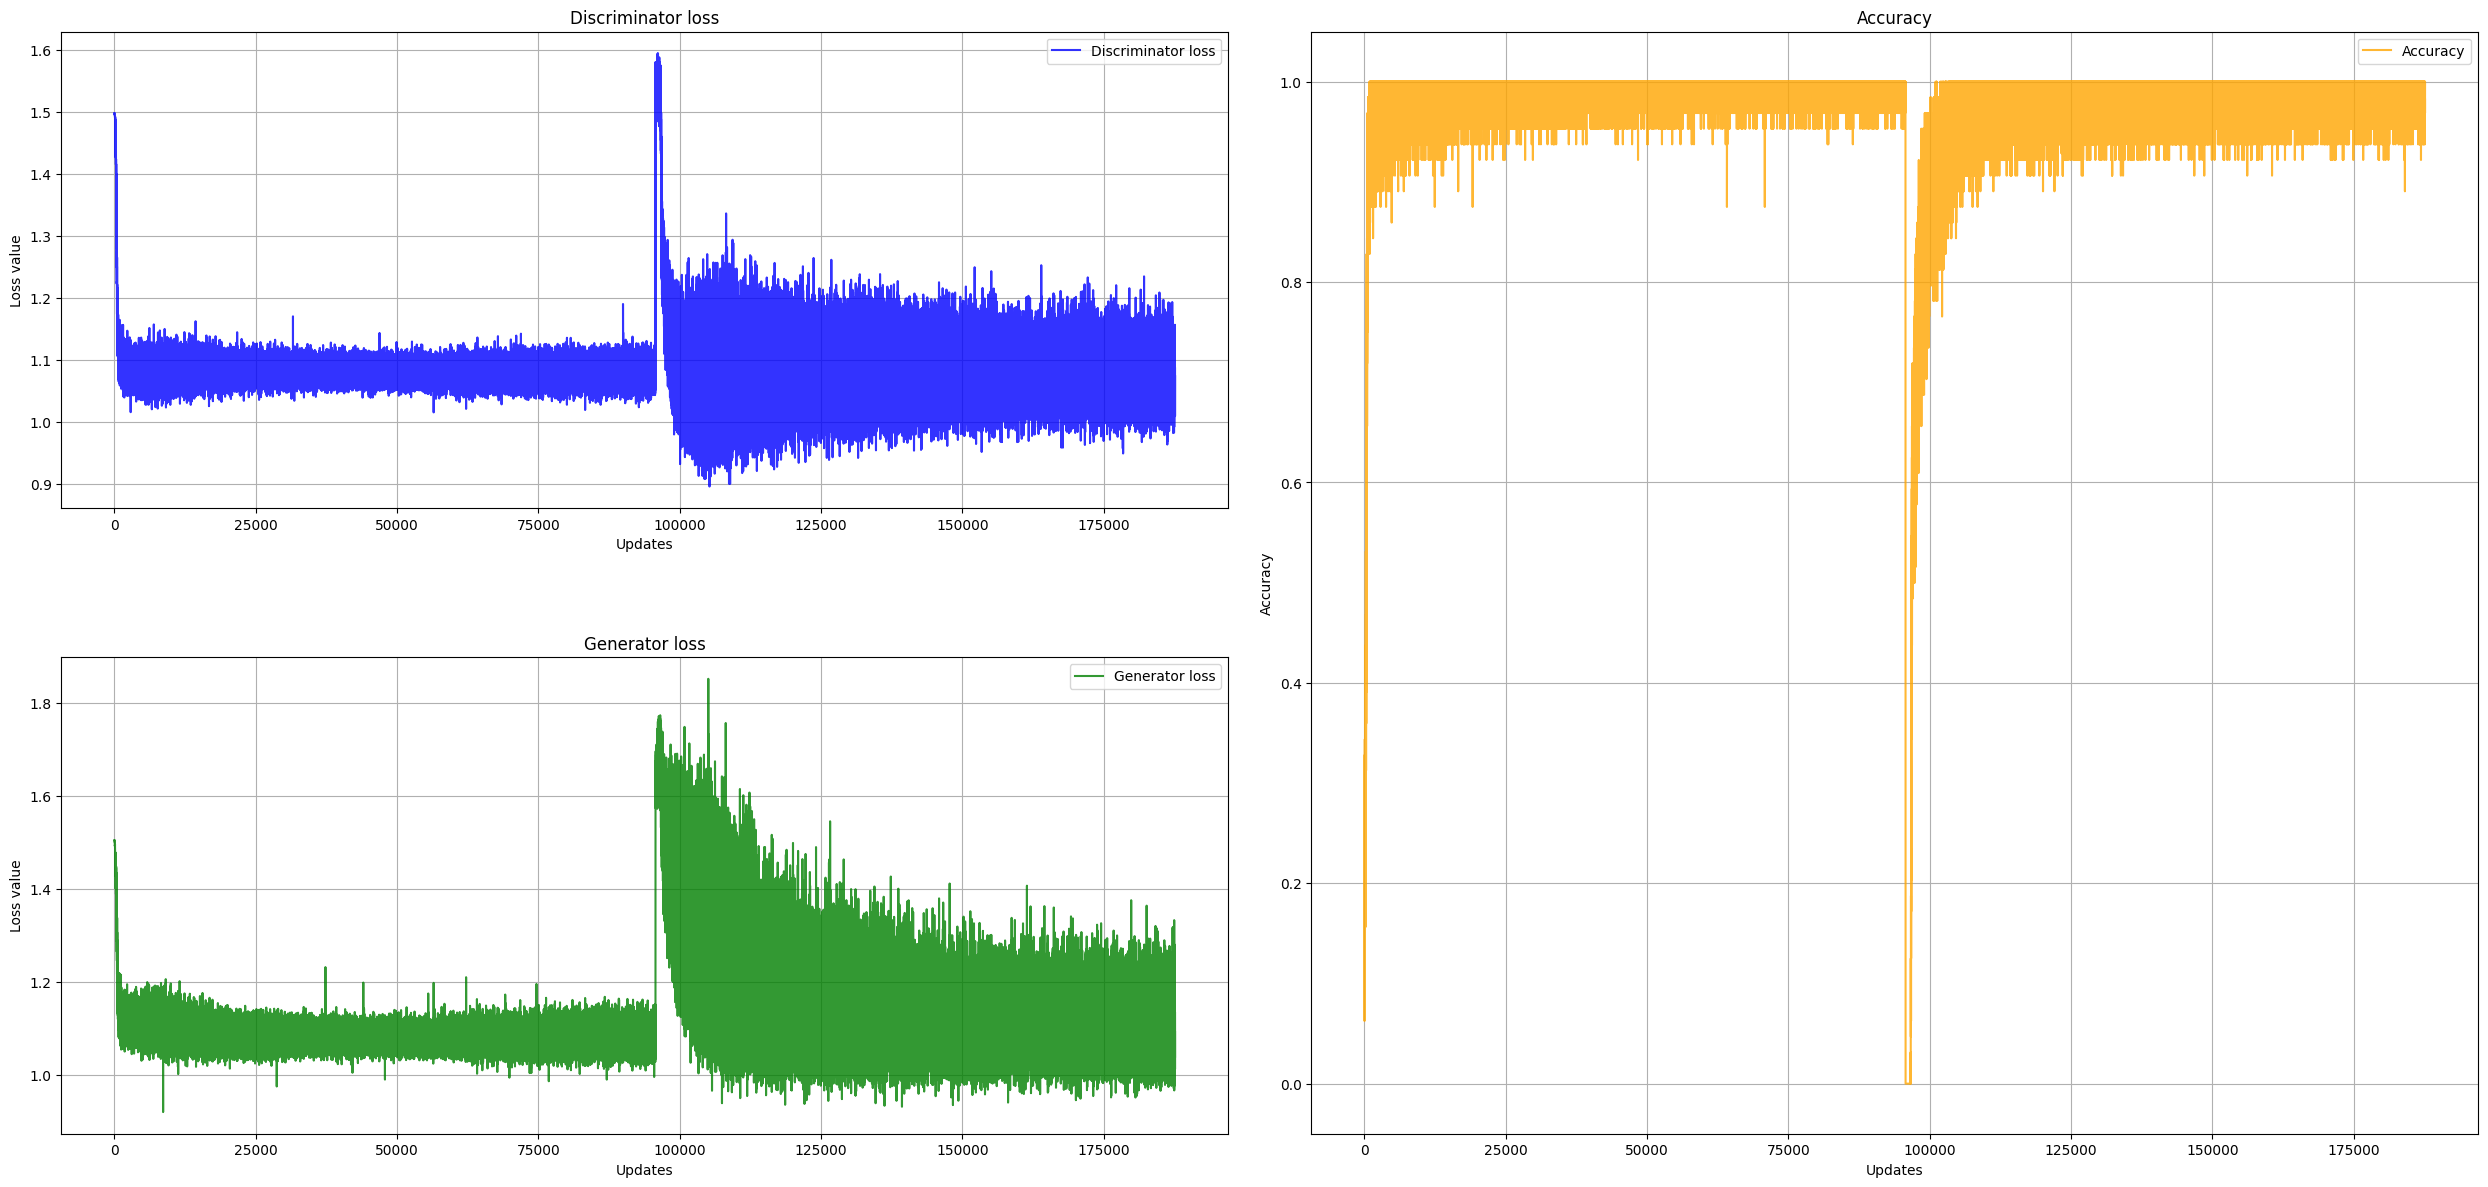

In [ ]:
plot_history(history)

In this configuration, the constant seems to be very high and this leads to excessive regularization. In fact, the model generates perfectly the digits of the first experience, and bad (not clear) the digits of the second one.

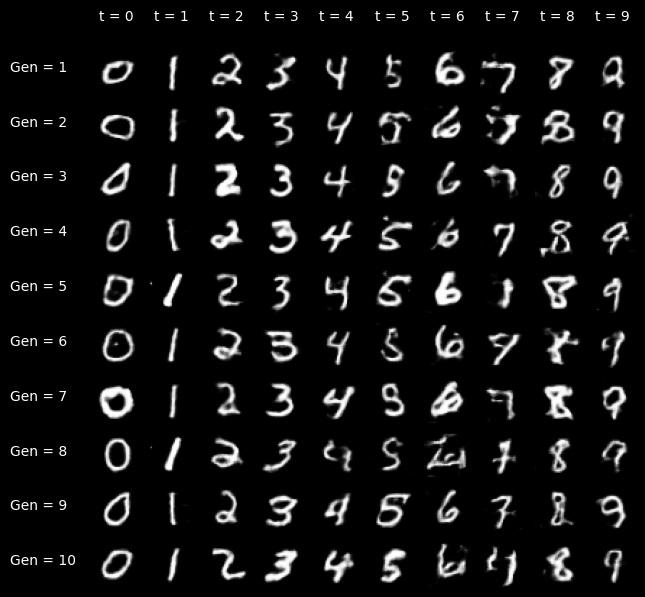

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Learning from 3 experiences and cost = 0.3

Oss. With the 3 or more experiences, the architecture purposed seems doesn't achieve a good results. The literature suggests applying a dynamic *batch_size* and *lr* values during the epochs. In the first epoch a high lr and a small batch_size to obtain a stable solution, then progressively decrease the lr and increase batch_size.

In [4]:
# We have chosen to diversity the epochs for each experience,
# because it seems that in the last experience more epochs are required.
config["n_epochs"] = [100,100,150]

In [ ]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences), const_ra=0.3)

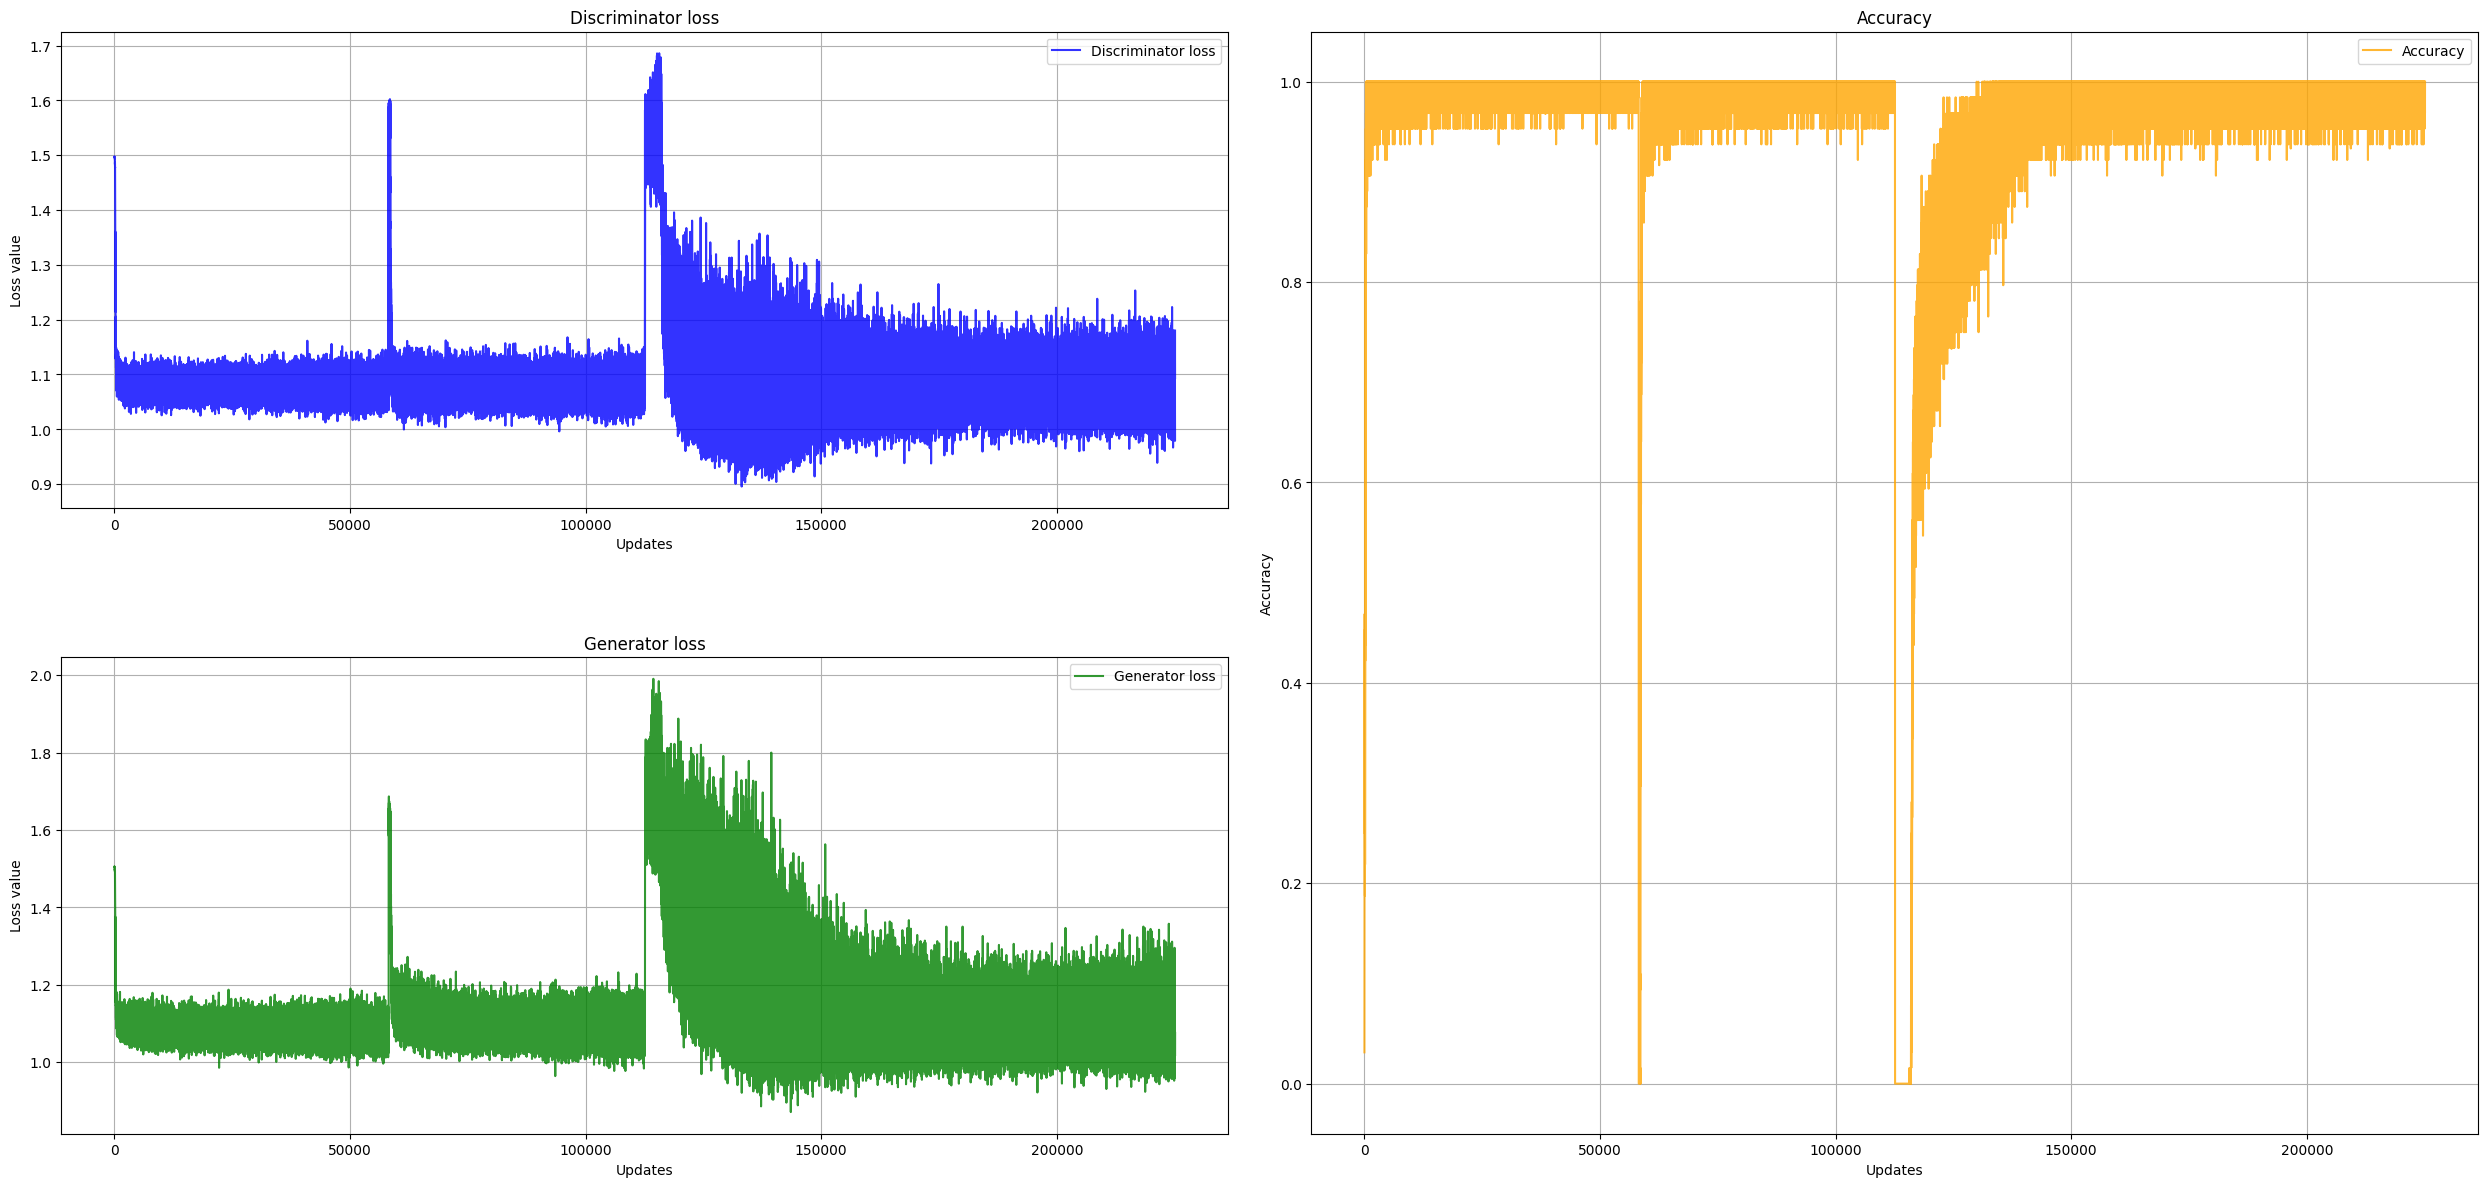

In [6]:
plot_history(history)

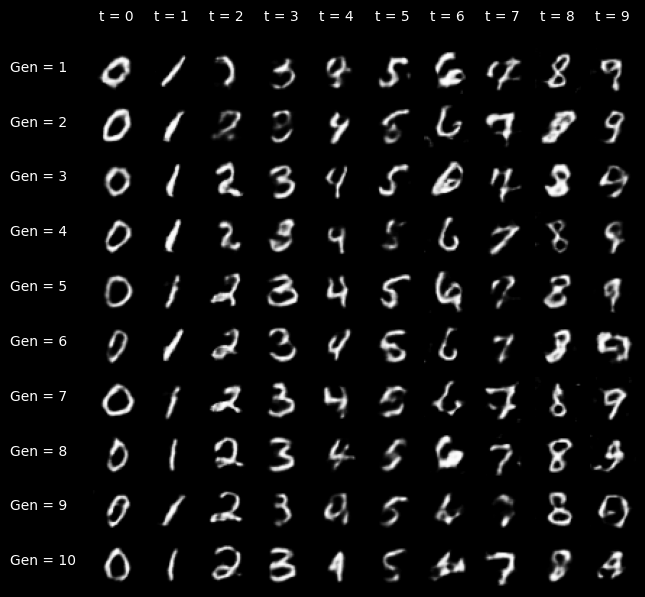

In [7]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Learning from 3 experiences and cost = 0.5

In [ ]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences), const_ra=0.5)

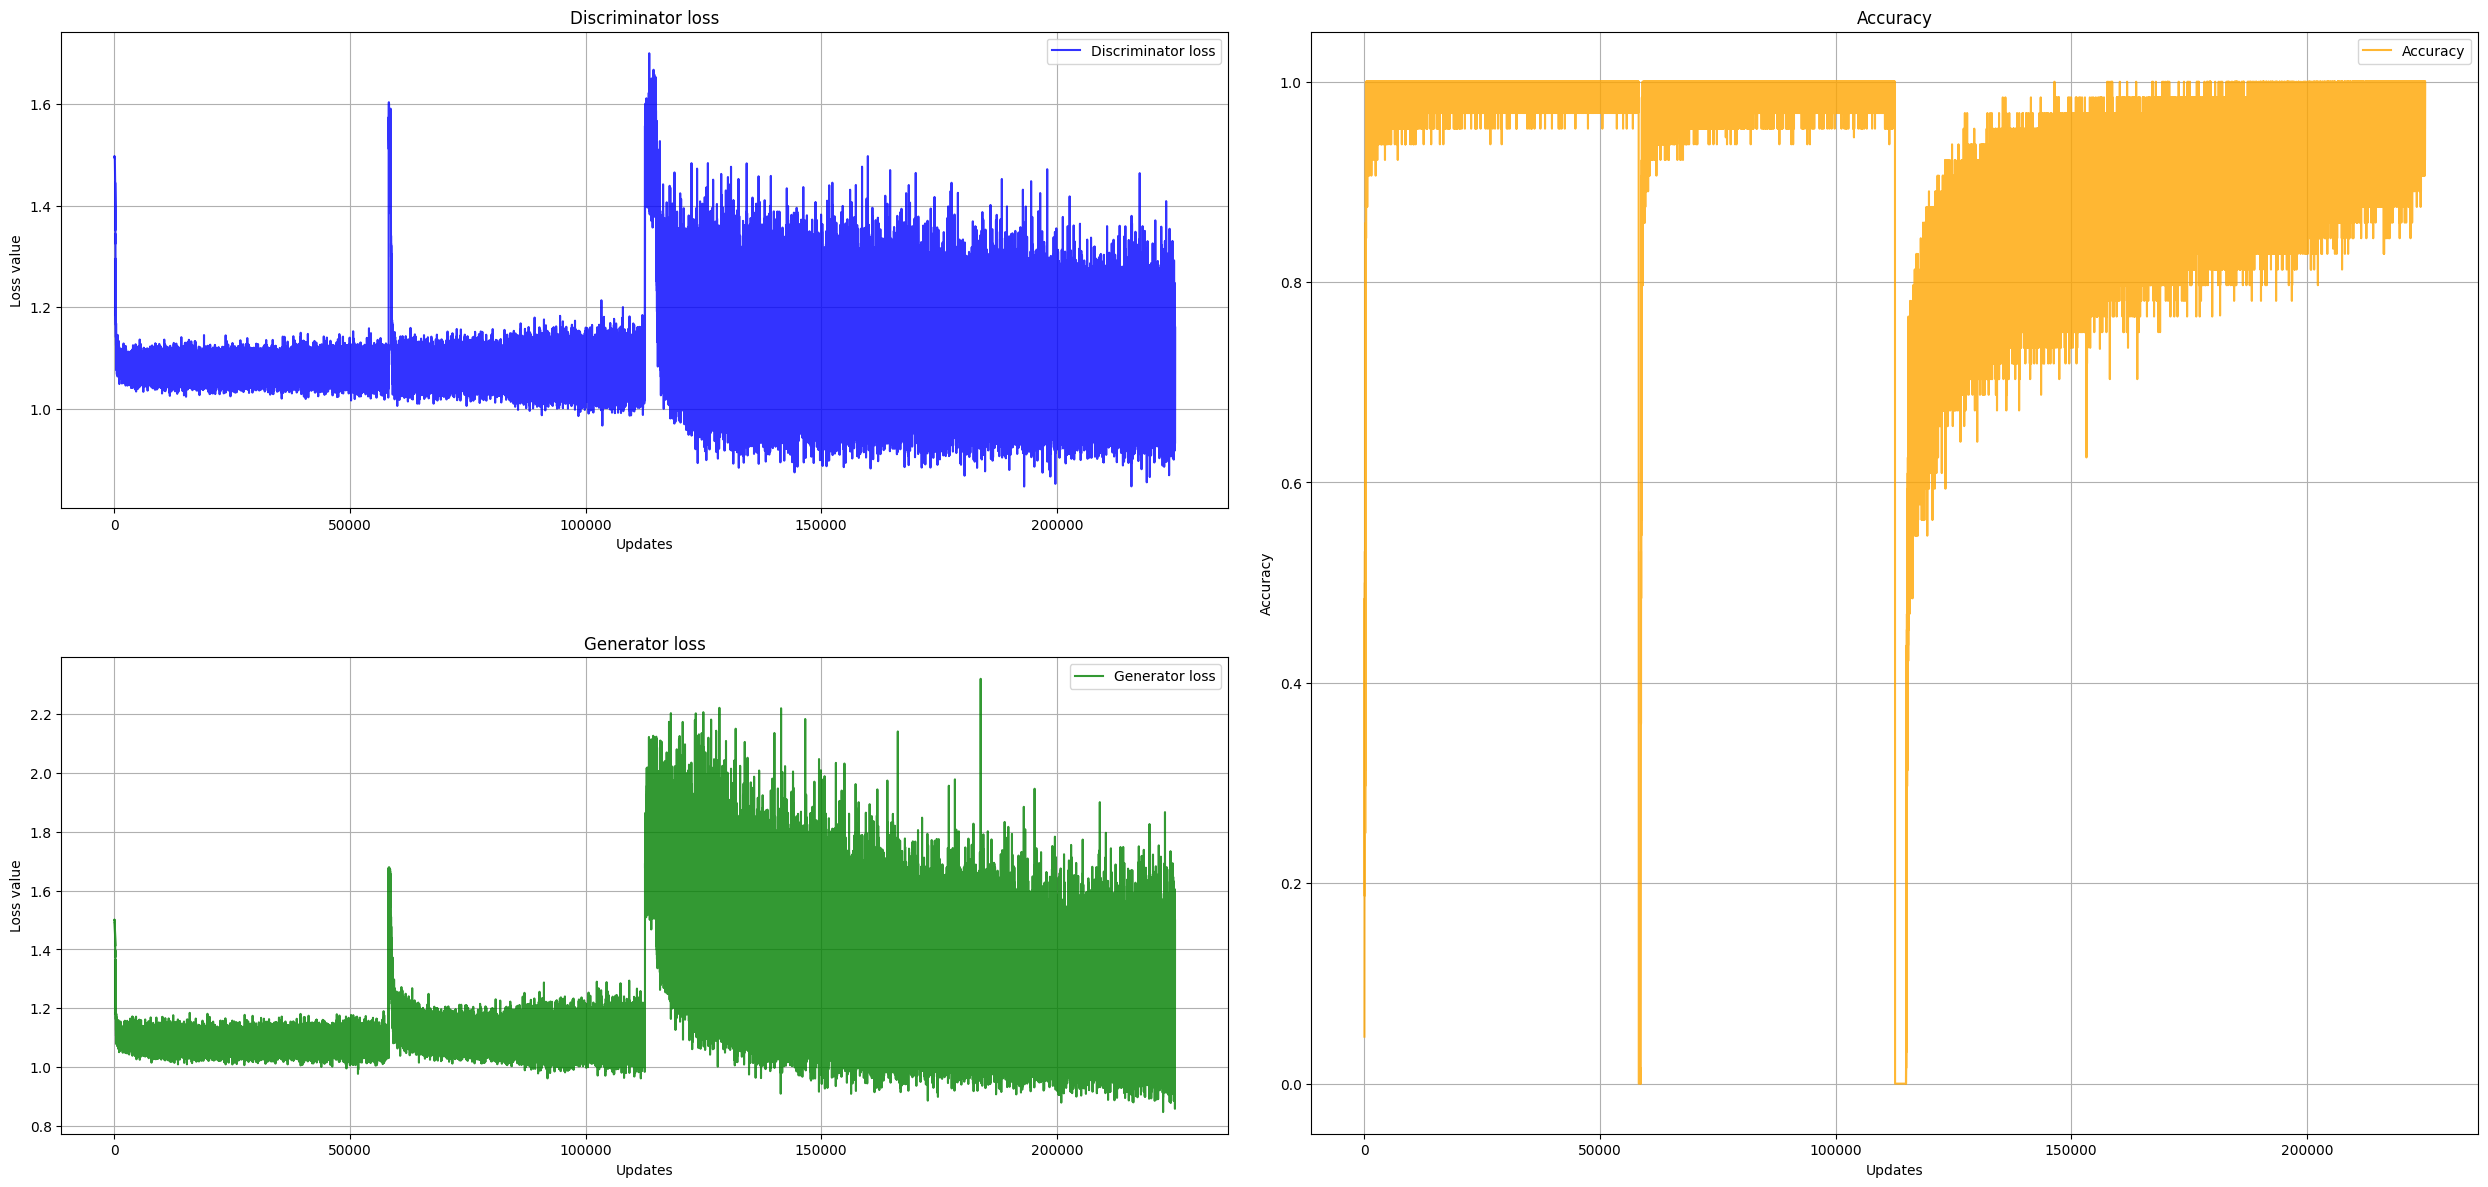

In [ ]:
plot_history(history)

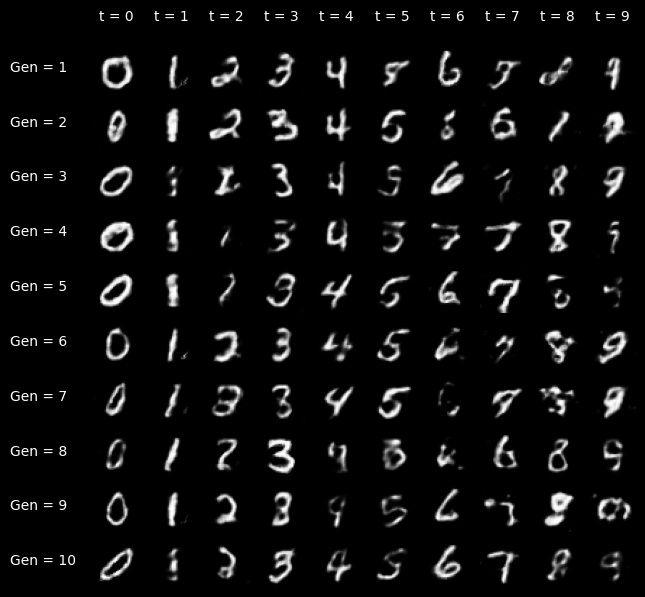

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

### Learning from 3 experiences and cost = 0.7

In [ ]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences), const_ra=0.7)

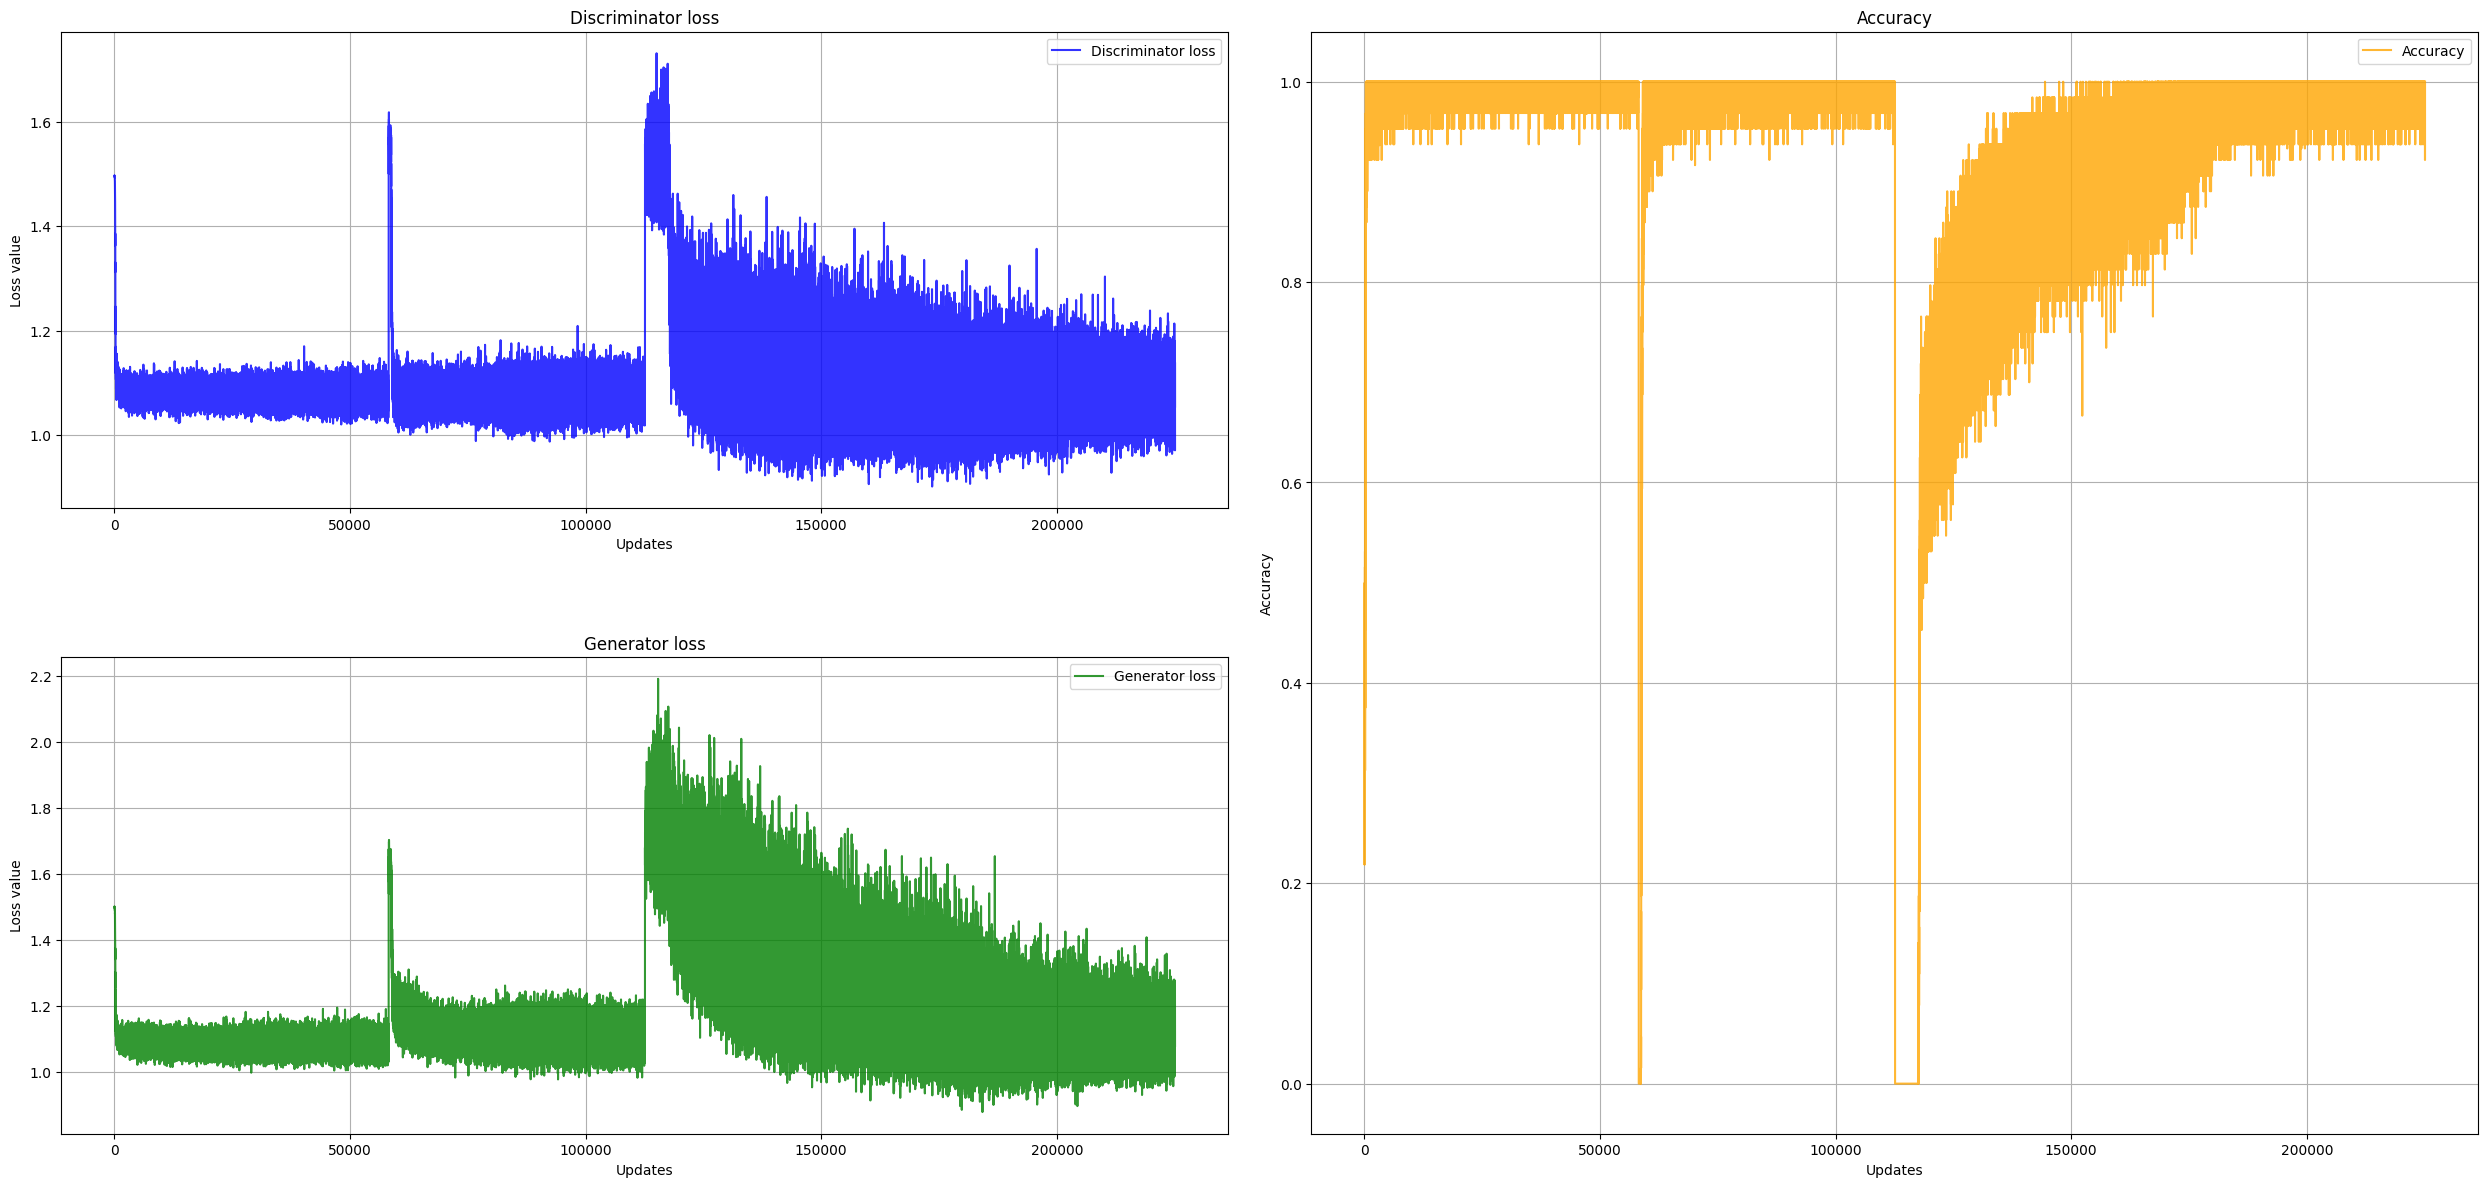

In [ ]:
plot_history(history)

In this case, the model seems to be too much regularized.

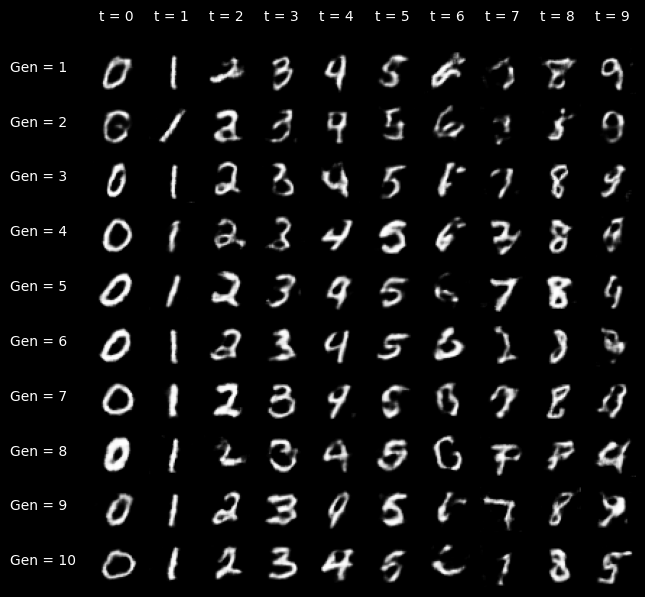

In [ ]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])